## Imports and Setup

In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parent  # parent of notebooks/
sys.path.append(str(project_root))

from src.eda.eda import EDAHelper
from src.utils.helpers import load_raw_data, ensure_dirs
from src.config.config import Config

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ensure_dirs()

In [3]:
# Load the raw CSV file
df = load_raw_data("data.csv")
df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [5]:
# Create EDA helper object
eda = EDAHelper(df)

results = eda.run_all(top_n=10)
results.keys()


dict_keys(['overview', 'missing_values', 'numeric_summary', 'categorical_summary', 'correlation_matrix', 'outlier_summary'])

## Overview of the Data

In [6]:
overview = results['overview']

print("="*60)
print("📊 Dataset Overview")
print("="*60)

# Number of rows and columns
print(f"Number of rows: {overview['n_rows']}")
print(f"Number of columns: {overview['n_cols']}\n")


# Column dtypes nicely
print("\nColumn data types:")
print(overview['dtypes'])


📊 Dataset Overview
Number of rows: 95662
Number of columns: 16


Column data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


## Identifying Missing Values

In [7]:
missing_values = results['missing_values']
missing_values



,column,missing_count,missing_values_percentage
0,TransactionId,0,0.0
1,BatchId,0,0.0
2,AccountId,0,0.0
3,SubscriptionId,0,0.0
4,CustomerId,0,0.0
5,CurrencyCode,0,0.0
6,CountryCode,0,0.0
7,ProviderId,0,0.0
8,ProductId,0,0.0
9,ProductCategory,0,0.0


## Summary Statistics

### Numerical Features

In [8]:
numeric_summary = results['numeric_summary']
print("\n" + "="*60)
print("🔹 Numeric Summary")
print("="*60)
numeric_summary


🔹 Numeric Summary


,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


### Categorical Features

In [9]:
categorical_summary = results['categorical_summary']

print("\n" + "="*60)
print(f"🔹 Top 10 Values for Categorical Columns")
print("="*60)
for col, counts in categorical_summary.items():
        print(f"\nColumn: {col}")
        print(counts)


🔹 Top 10 Values for Categorical Columns

Column: TransactionId
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64

Column: BatchId
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_86880      6
BatchId_22960      6
Name: count, dtype: int64

Column: AccountId
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

Column: SubscriptionId
SubscriptionId
SubscriptionId_3829    32630
Subscription

- `TransactionId`, `AccountId`, `SubscriptionId`: These are mostly unique or highly skewed. TransactionId is not useful for modeling, while a few accounts or subscriptions account for most transactions.

- `BatchId`: Some batches occur more frequently than others, which could be useful for grouping transactions.

- `CustomerId`: A small number of customers contribute a large share of transactions.

- `CurrencyCode`: Only a single value (UGX), so it does not provide useful information.

- `ProviderId` & `ChannelId`: Most transactions are concentrated among a few providers and channels; rare values may indicate unusual patterns.

- `ProductId` & `ProductCategory`: A few products and categories dominate, while rare ones could represent higher-risk or unusual transactions.

- `TransactionStartTime`: Most timestamps are unique, making this column effectively continuous rather than categorical.

Overall: Many categorical features are skewed, some are non-informative, and rare categories in certain columns may be useful for detecting anomalies or potential fraud.

## Distribution of Numerical Features

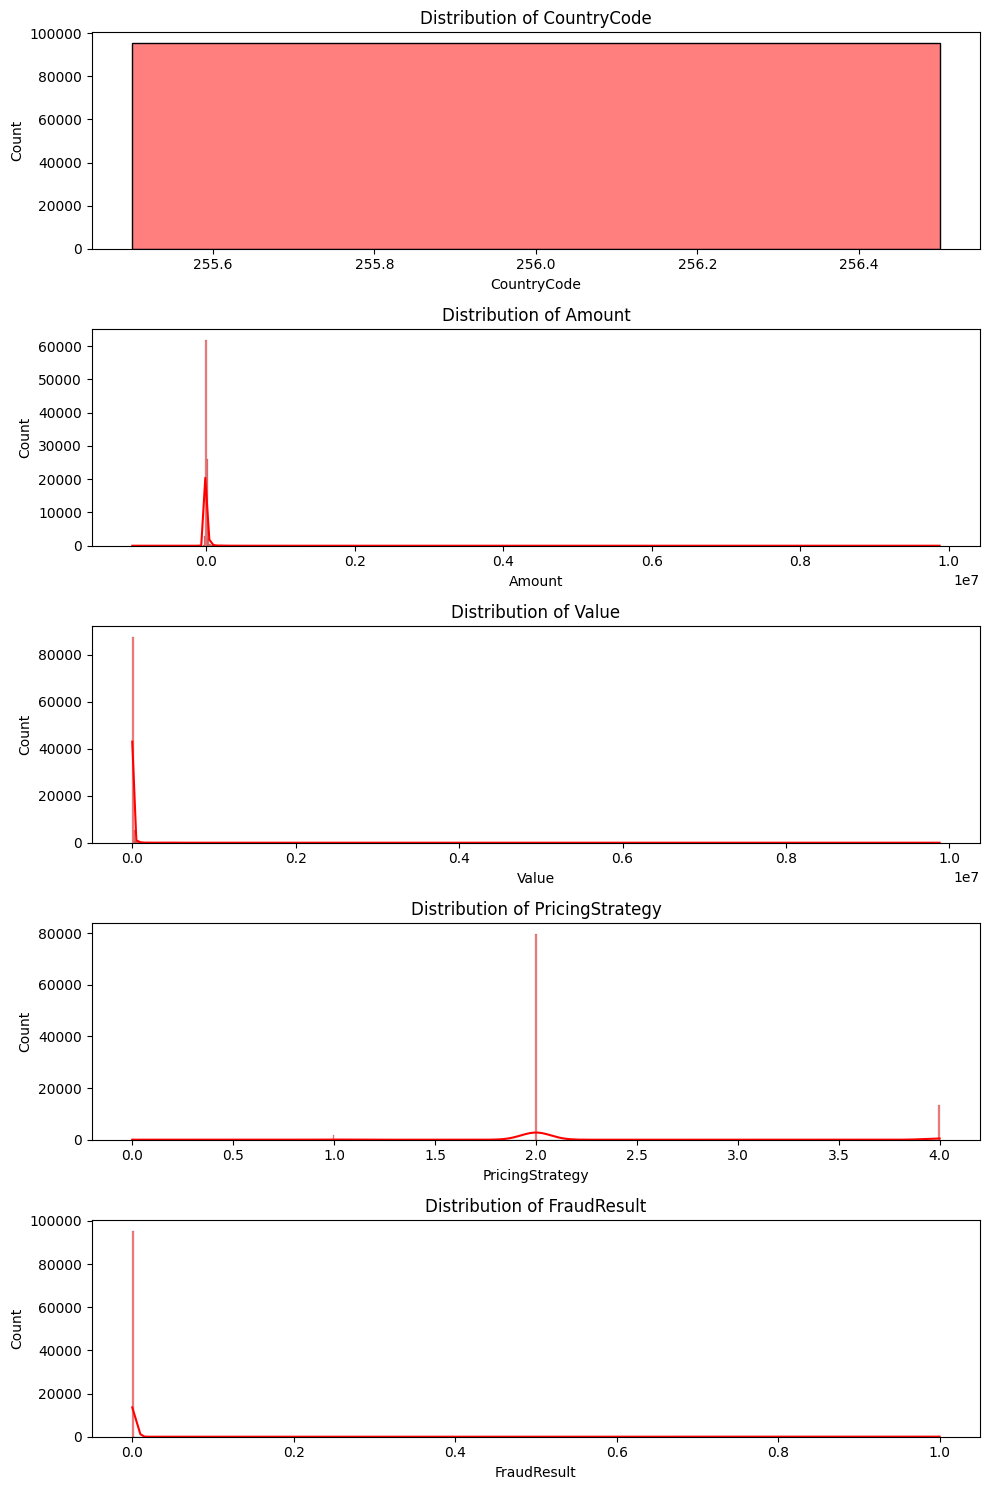

In [10]:
numeric_cols = list(numeric_summary.index)

plt.figure(figsize=(10, len(numeric_cols)*3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(df[col].dropna(), kde=True, color="red")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


1. **CountryCode**  
   - Almost all transactions belong to a single country (value ~256).  
   - **Interpretation:** The dataset is heavily concentrated in one country, offering little geographic variation.

2. **Amount**  
   - Most transactions have amounts very close to zero, despite the range extending up to 10,000,000.  
   - **Interpretation:** The majority of transactions are small in value, with extreme values being rare.

3. **Value**  
   - Similar to `Amount`, the `Value` feature is concentrated at the low end of its range.  
   - **Interpretation:** Most recorded values are very small, indicating limited variability.

4. **PricingStrategy**  
   - Nearly all transactions use the same pricing strategy.  
   - **Interpretation:** There is almost no variation in pricing strategy across the dataset.

5. **FraudResult**  
   - The `FraudResult` feature is dominated by a single value (close to zero).  
   - **Interpretation:** Non-fraudulent transactions (or a specific type of outcome) overwhelmingly dominate, showing extreme class imbalance.





## Distribution of Categorical Features

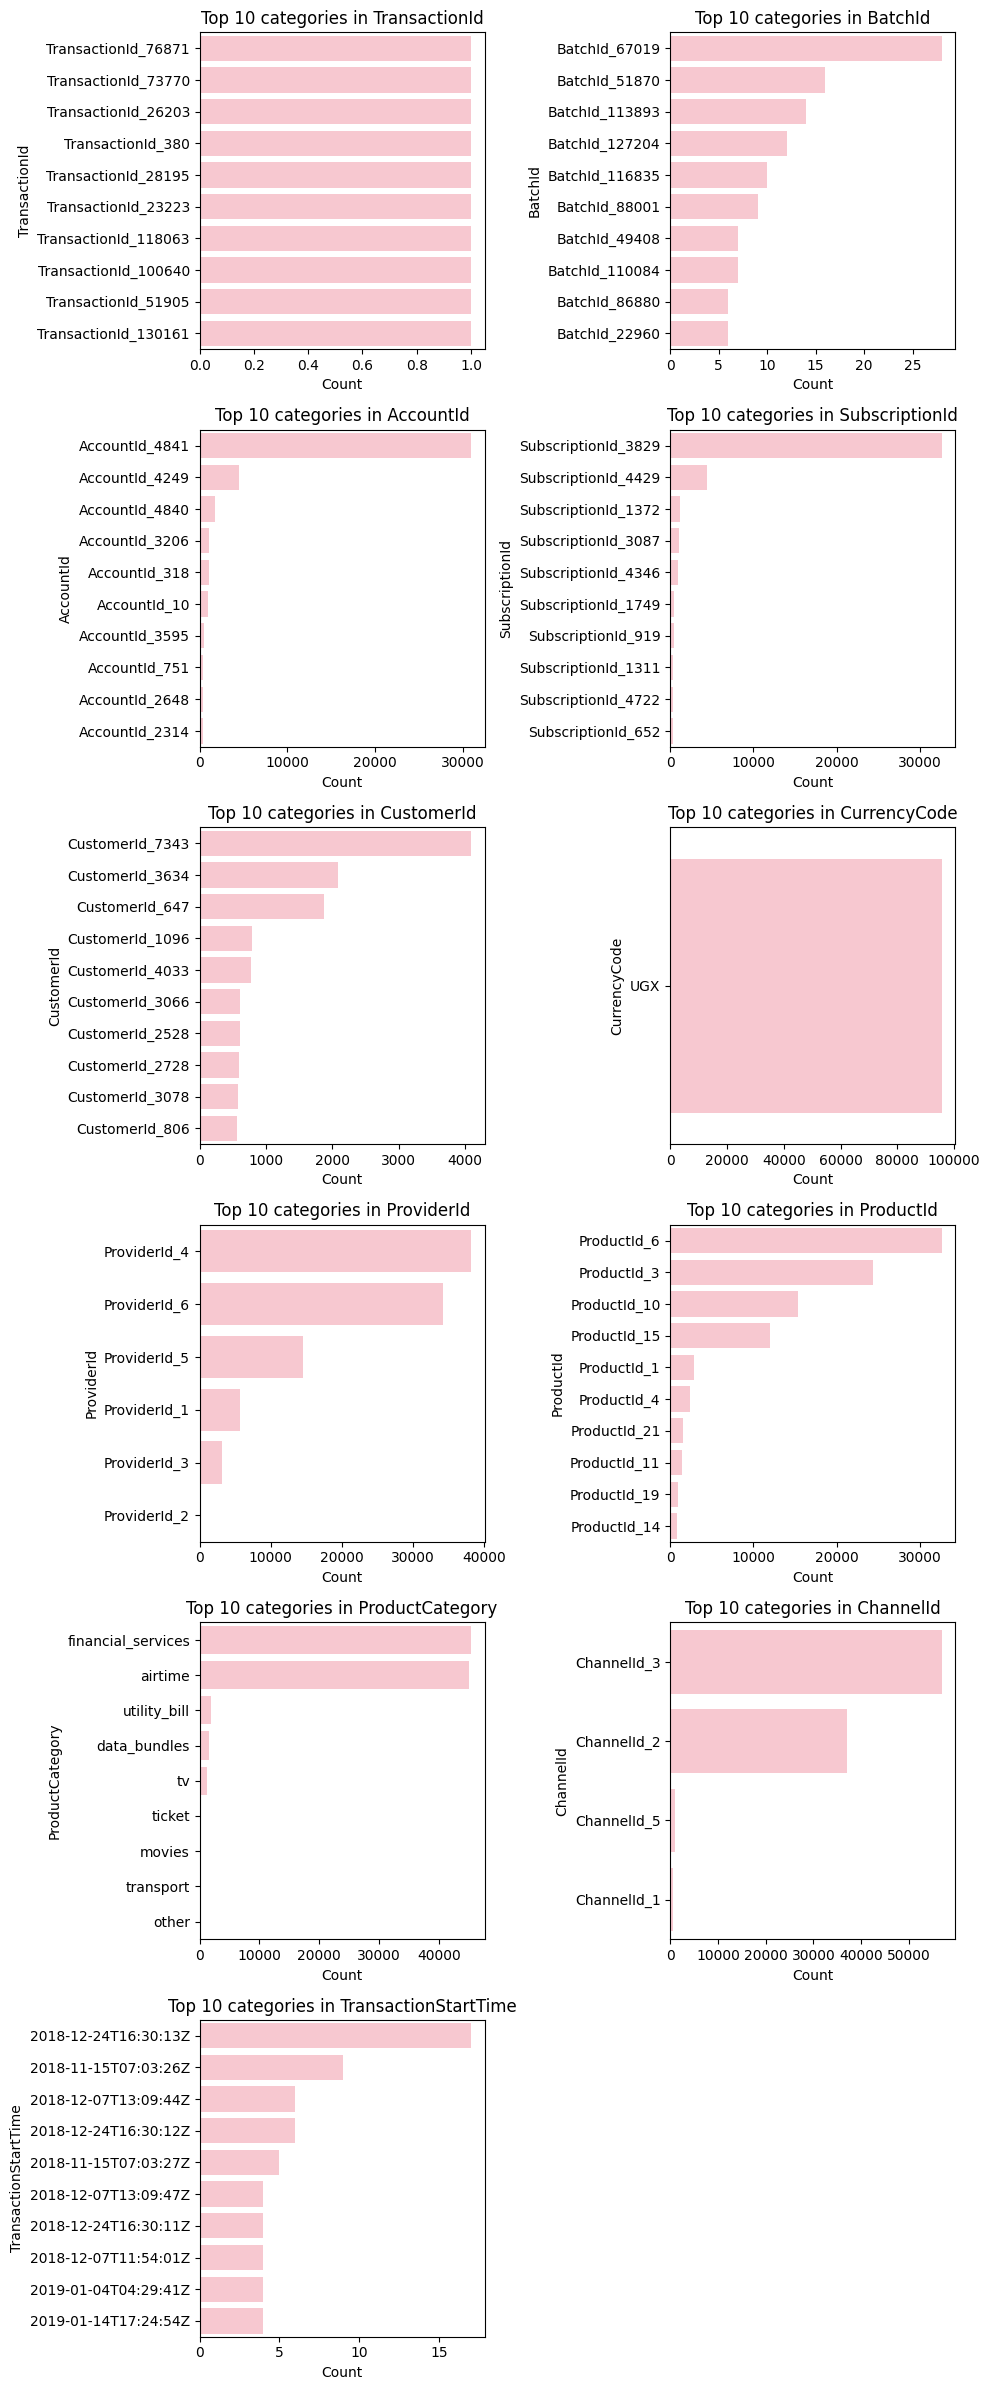

In [11]:
categorical_cols = list(categorical_summary.keys())
top_n = 10

# Decide layout
cols_per_row = 2
num_rows = (len(categorical_cols) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(10, num_rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    top_values = categorical_summary[col]
    sns.barplot(x=top_values.values, y=top_values.index, ax=axes[i], color="pink")
    axes[i].set_title(f"Top {top_n} categories in {col}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)

# Hide extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



- **CurrencyCode:** Almost all transactions use `UGX`.  
- **ChannelId & ProviderId:** A few channels and providers dominate the dataset.  
- **ProductId & ProductCategory:** `ProductId_3` and categories like `financial_services` and `utility_bills` are most common.  
- **AccountId:** A small number of accounts appear most frequently.  
- **Time & ID features:** Exact timestamps and IDs are mostly unique, so top values occur rarely.  

**Conclusion:** Transactions are concentrated in a few categories and dominated by small sets of IDs, channels, and products. This imbalance should be considered when analyzing rare events like fraud.


## Correlation analysis

In [12]:
print("\n" + "="*60)
print("🔹 Correlation Matrix")
print("="*60)
correlation_matrix = results['correlation_matrix']
correlation_matrix
    


🔹 Correlation Matrix


,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


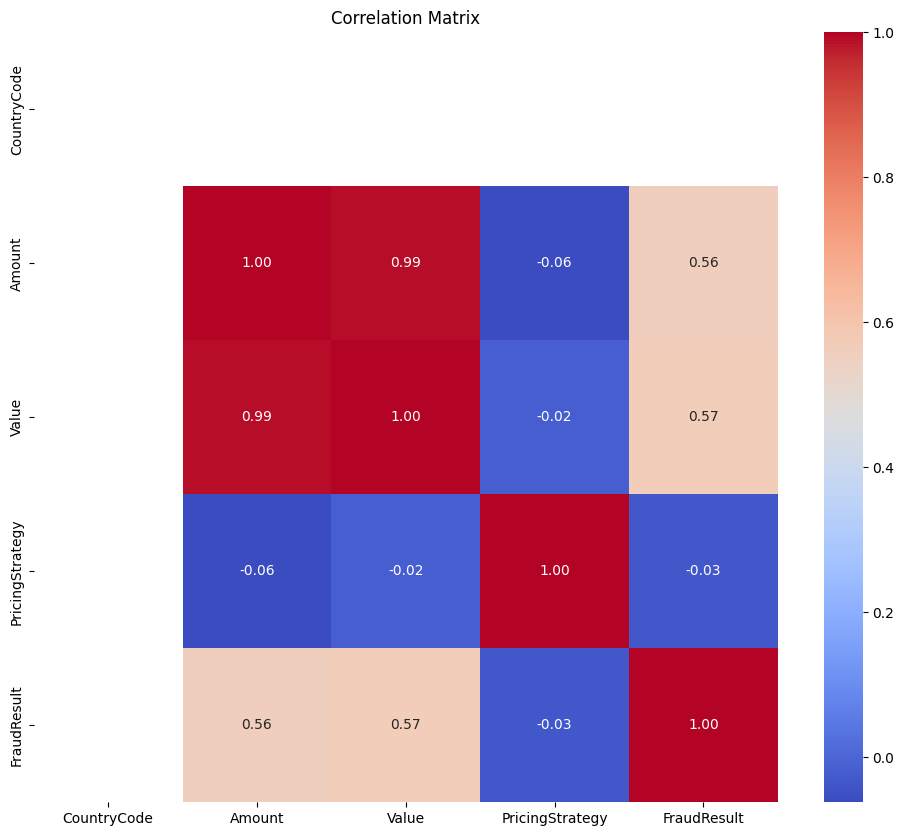

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

The matrix clearly shows that transaction size (`Amount` and `Value`) is the strongest indicator/predictor for the FraudResult. The other variables, particularly `PricingStrategy`, appear to be mostly independent of the transaction's size and the final fraud result.

## Outlier Detection

In [14]:
outliers = results['outlier_summary']
print("\n" + "="*60)
print("🔹 Outlier Summary (IQR Method)")
print("="*60)
outliers


🔹 Outlier Summary (IQR Method)


,Q1,Q3,IQR,Lower Bound,Upper Bound,Outliers Count,Outliers %
CountryCode,256.0,256.0,0.0,256.0,256.0,0,0.000000
Amount,-50.0,2800.0,2850.0,-4325.0,7075.0,24441,25.549330
Value,275.0,5000.0,4725.0,-6812.5,12087.5,9021,9.430077
PricingStrategy,2.0,2.0,0.0,2.0,2.0,15814,16.531120
FraudResult,0.0,0.0,0.0,0.0,0.0,193,0.201752


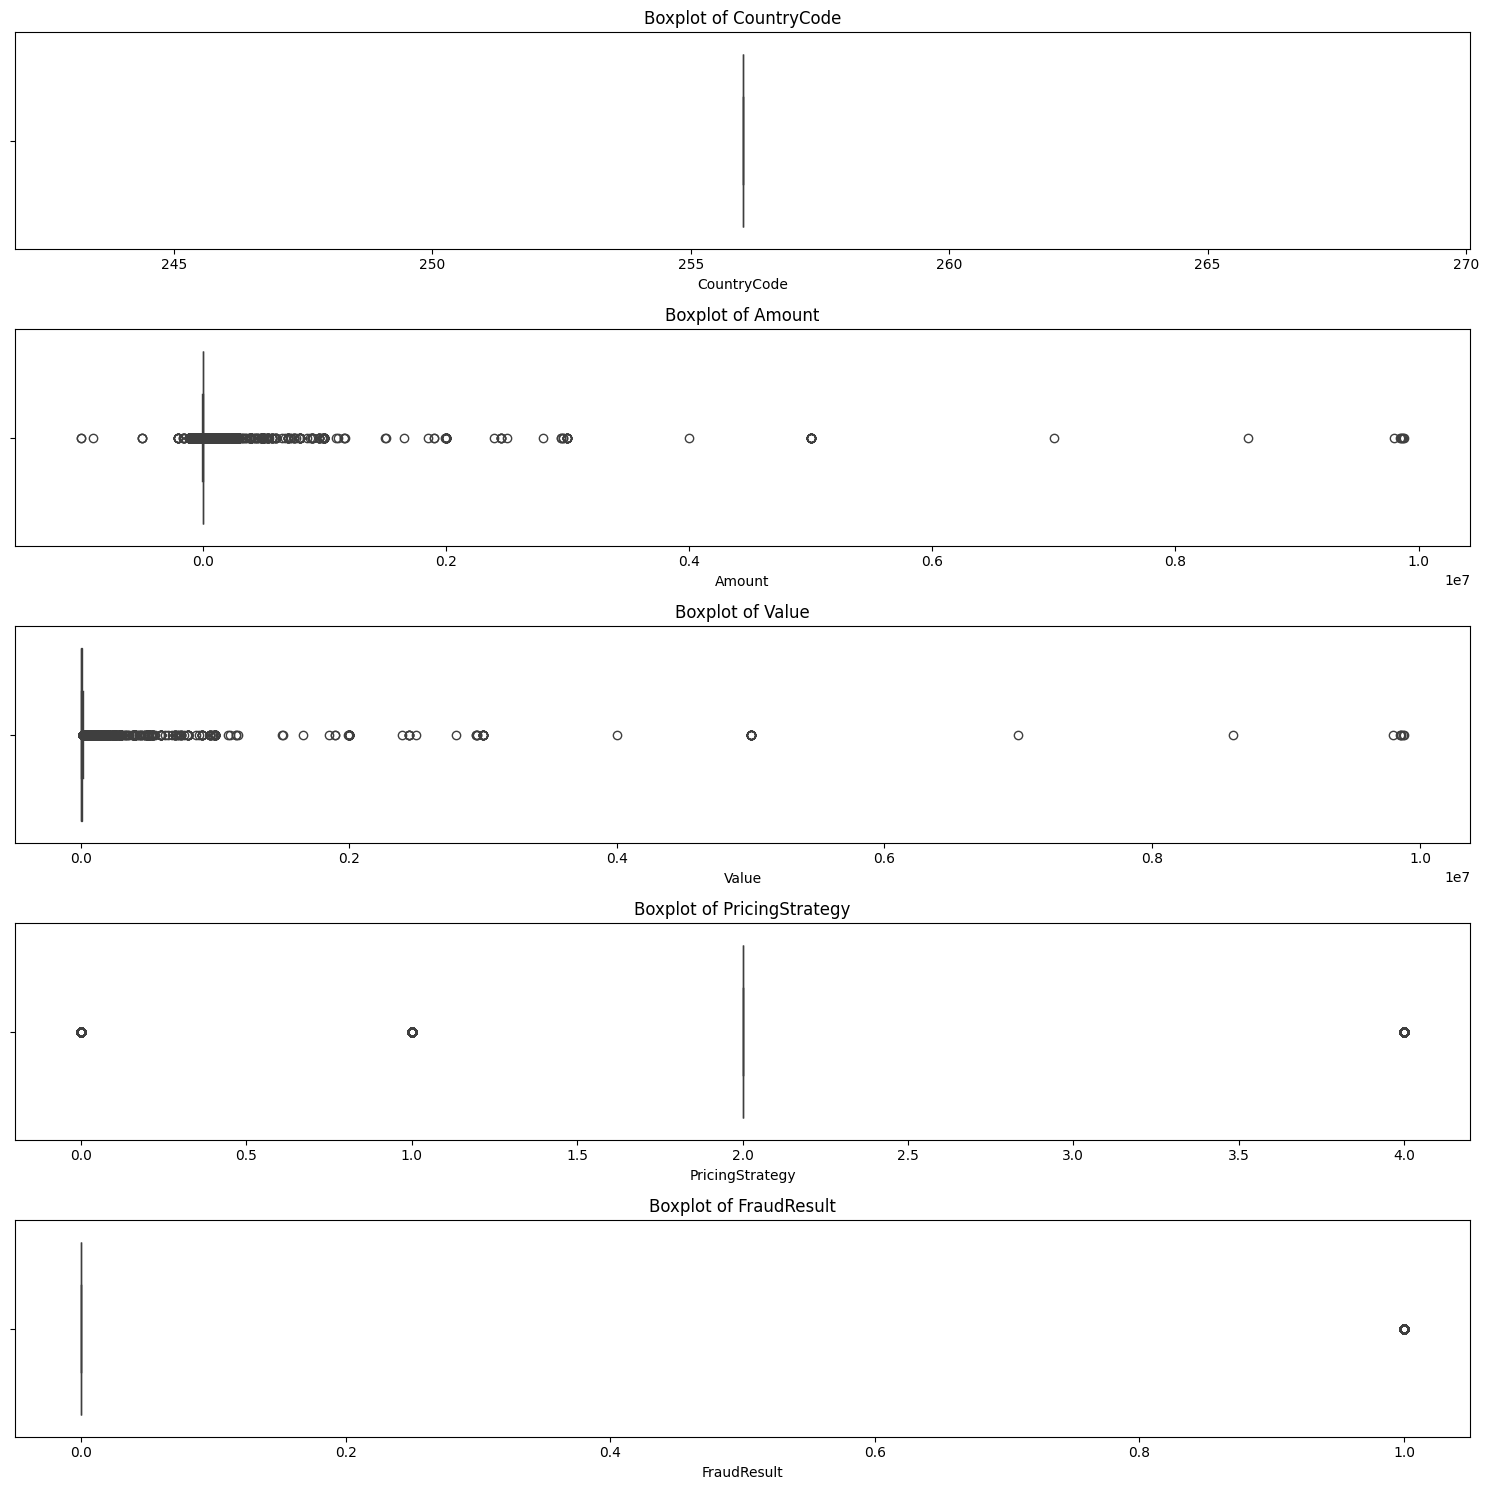

In [15]:
plt.figure(figsize=(15, len(numeric_cols)*3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Categorical Encoding: `CountryCode` and `PricingStrategy` are not continuous variables and should be treated as categorical features in analysis or model building.

Class Imbalance: `FraudResult` is heavily imbalanced, requiring techniques such as oversampling, undersampling, or algorithms designed for imbalanced data when building a model.

## Top 3 Insights

1. Transaction Size Drives Risk

    - `Amount` and `Value` are highly skewed, with most transactions being small and a few very large.

    - Transaction size is the strongest predictor of fraud risk, making it a key feature for modeling.

2. Skewed Categorical Features

    - Most categorical features (`AccountId`, `SubscriptionId`, `ProviderId`, `ProductId`, `ProductCategory`) are dominated by a few values.

    - Rare categories may indicate unusual activity and could be useful signals for fraud detection.

3. Severe Class Imbalance

    - `FraudResult` is overwhelmingly non-fraudulent.

    - Handling this imbalance is critical, requiring oversampling, undersampling, or specialized algorithms for accurate modeling.

4. Clean Dataset 

    - The data has no missing values across all columns, so no imputation is needed.
